In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train = pd.read_csv("train.tsv", sep='\t', header=None,     names=[
        "label", "statement", "subject", "speaker", "speaker_job_title", 
        "state_info", "party_affiliation", "barely_true_counts", 
        "false_counts", "half_true_counts", "mostly_true_counts", 
        "pants_on_fire_counts", "context"
    ])
test = pd.read_csv("test.tsv", sep='\t', header=None,     names=[
        "label", "statement", "subject", "speaker", "speaker_job_title", 
        "state_info", "party_affiliation", "barely_true_counts", 
        "false_counts", "half_true_counts", "mostly_true_counts", 
        "pants_on_fire_counts", "context"
    ])
valid = pd.read_csv("valid.tsv", sep='\t', header=None,     names=[
        "label", "statement", "subject", "speaker", "speaker_job_title", 
        "state_info", "party_affiliation", "barely_true_counts", 
        "false_counts", "half_true_counts", "mostly_true_counts", 
        "pants_on_fire_counts", "context"
    ])

In [6]:
df = pd.concat([train, test, valid], ignore_index=True)
df.head()

,label,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12791 entries, 0 to 12790
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   label                 12791 non-null  object 
 1   statement             12791 non-null  object 
 2   subject               12789 non-null  object 
 3   speaker               12789 non-null  object 
 4   speaker_job_title     9223 non-null   object 
 5   state_info            10040 non-null  object 
 6   party_affiliation     12789 non-null  object 
 7   barely_true_counts    12789 non-null  float64
 8   false_counts          12789 non-null  float64
 9   half_true_counts      12789 non-null  float64
 10  mostly_true_counts    12789 non-null  float64
 11  pants_on_fire_counts  12789 non-null  float64
 12  context               12660 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.3+ MB
None


In [8]:
print(df.describe())

       barely_true_counts  false_counts  half_true_counts  mostly_true_counts  \
count        12789.000000  12789.000000      12789.000000        12789.000000   
mean            11.583939     13.359059         17.185785           16.497850   
std             18.978037     24.140086         35.847678           36.165276   
min              0.000000      0.000000          0.000000            0.000000   
25%              0.000000      0.000000          0.000000            0.000000   
50%              2.000000      2.000000          3.000000            3.000000   
75%             12.000000     15.000000         13.000000           12.000000   
max             70.000000    114.000000        160.000000          163.000000   

       pants_on_fire_counts  
count          12789.000000  
mean               6.251388  
std               16.180777  
min                0.000000  
25%                0.000000  
50%                1.000000  
75%                5.000000  
max              105.000000  


In [9]:
df['party_affiliation'].value_counts()

party_affiliation
republican                      5665
democrat                        4137
none                            2181
organization                     264
independent                      180
newsmaker                         64
libertarian                       51
journalist                        49
activist                          45
columnist                         44
talk-show-host                    32
state-official                    24
labor-leader                      15
business-leader                   11
tea-party-member                  10
education-official                 3
green                              3
constitution-party                 3
government-body                    2
county-commissioner                2
liberal-party-canada               1
Moderate                           1
democratic-farmer-labor            1
ocean-state-tea-party-action       1
Name: count, dtype: int64

In [10]:
df['party_affiliation'] = df['party_affiliation'].str.lower()

# consolidating party affiliations

def simplify_party(party):
    if not isinstance(party, str): 
        return "other"  
    
    party = party.lower()  
    
    if party in ["republican", "democrat", "independent", "libertarian", "green", "constitution-party"]:
        return party  
    elif "tea-party" in party or "ocean-state-tea-party-action" in party:
        return "tea-party"
    elif "journalist" in party or "columnist" in party or "talk-show-host" in party:
        return "media"
    elif "organization" in party or "government-body" in party:
        return "organization"
    elif "activist" in party or "labor-leader" in party:
        return "activist"
    elif "business-leader" in party:
        return "business"
    elif "education-official" in party:
        return "education"
    else:
        return "other"

df["party_affiliation"] = df["party_affiliation"].apply(simplify_party)
df['party_affiliation'].value_counts()
# one hot encoding for ml models and label encoding for trees?
 

party_affiliation
republican            5665
democrat              4137
other                 2276
organization           266
independent            180
media                  125
activist                60
libertarian             51
business                11
tea-party               11
education                3
green                    3
constitution-party       3
Name: count, dtype: int64

In [11]:
print(df['state_info'].value_counts().to_string())

state_info
Texas                                                1260
Florida                                              1231
Wisconsin                                             900
New York                                              829
Illinois                                              692
Ohio                                                  586
Georgia                                               545
Virginia                                              512
Rhode Island                                          452
Oregon                                                307
New Jersey                                            305
Massachusetts                                         250
Arizona                                               228
California                                            180
Washington, D.C.                                      141
Vermont                                               117
Pennsylvania                                          112
New

In [12]:
df['state_info'] = df['state_info'].str.lower().str.strip()
state_corrections = { #replacing entries with typos or redundancies
    'washington, d.c.': 'district of columbia',
    'washington dc': 'district of columbia',
    'washington d.c.': 'district of columbia',
    'massachusetts ': 'massachusetts',
    'washington state': 'washington',
    'virgina': 'virginia',
    'virgiia': 'virginia',
    'tennesse': 'tennessee',
    'tex': 'texas',
    'pa - pennsylvania': 'pennsylvania',
    'the united states': 'usa',
    'russia': 'foreign',
    'united kingdom': 'foreign',
    'qatar': 'foreign',
    'china': 'foreign',
    'atlanta': 'georgia'
}

df['state_info'] = df['state_info'].replace(state_corrections)
df = df[df['state_info'] != "virginia director, coalition to stop gun violence"]
print(df['state_info'].value_counts().to_string()) #to avoid truncated output

#omitting party affiliations?

#too many to do one hot encoding

state_info
texas                   1261
florida                 1237
wisconsin                902
new york                 831
illinois                 695
ohio                     589
georgia                  554
virginia                 517
rhode island             454
oregon                   310
new jersey               305
massachusetts            256
arizona                  228
california               184
district of columbia     174
vermont                  117
pennsylvania             113
new hampshire            108
arkansas                 103
kentucky                  98
tennessee                 89
maryland                  86
delaware                  84
alaska                    81
minnesota                 75
north carolina            72
nevada                    58
indiana                   52
missouri                  49
south carolina            39
new mexico                37
colorado                  33
louisiana                 33
michigan                  28
con

### Charts 

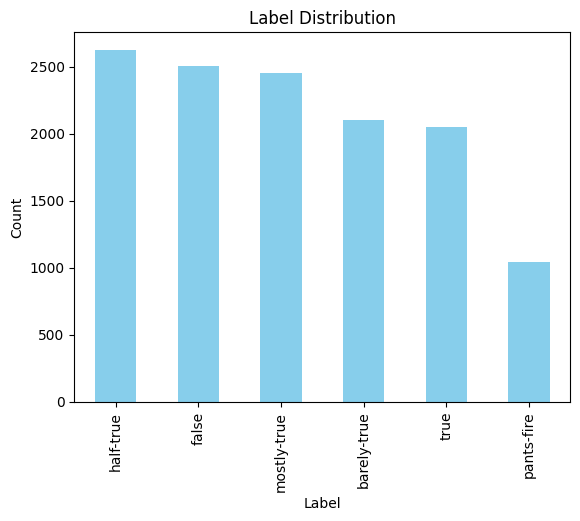

In [13]:
df['label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

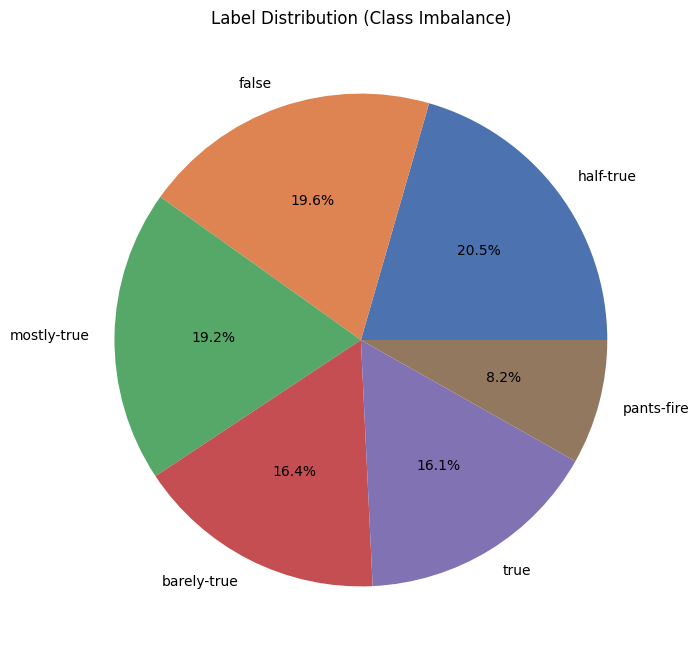

In [14]:
# Visualize label distribution (for classification)
plt.figure(figsize=(8, 8))
colors = sns.color_palette('deep')[0:6]
df['label'].value_counts().plot(kind='pie', colors = colors, autopct='%1.1f%%')

plt.title('Label Distribution (Class Imbalance)')
plt.ylabel('') 
plt.show()


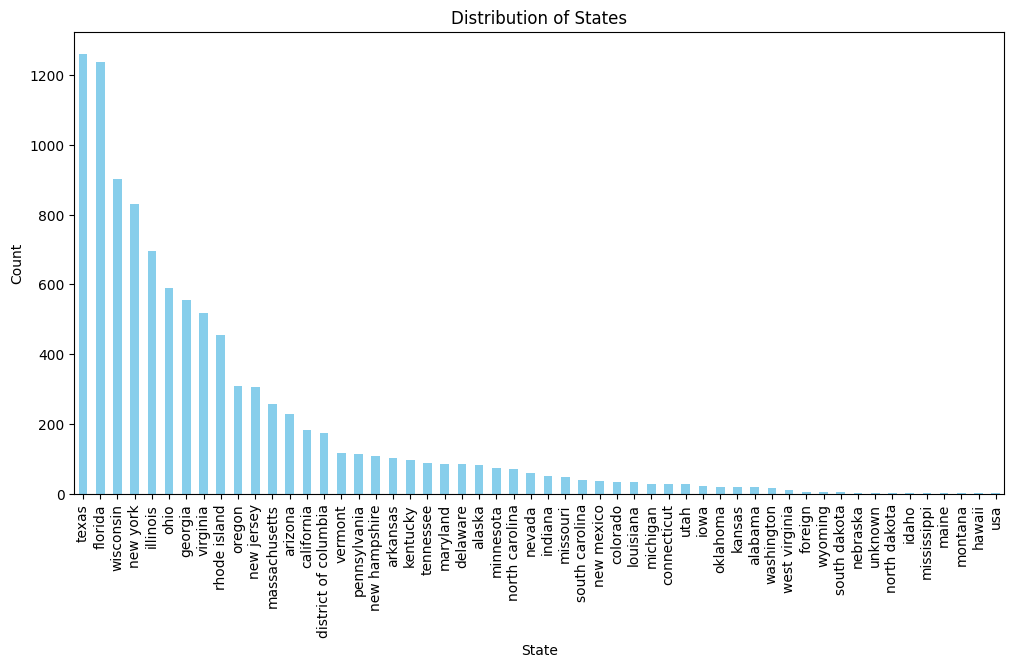

In [15]:
plt.figure(figsize=(12, 6))
df['state_info'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
# majority of data from texas and florida

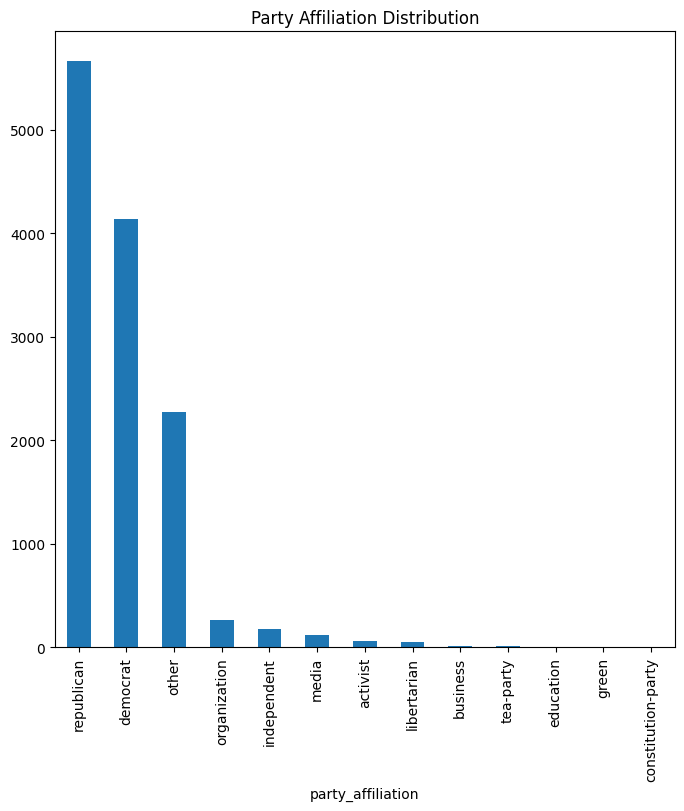

In [16]:
# Plot pie chart of party affiliation distribution
plt.figure(figsize=(8, 8))
df['party_affiliation'].value_counts().plot(kind='bar')
plt.title('Party Affiliation Distribution')
plt.ylabel('') 
plt.show()
